# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
print df.corr()

             X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X     0.085223  

In [6]:
df_cor = df.iloc[:,5:6].values
df_cor

array([[ 26.2],
       [ 35.4],
       [ 43.7],
       [ 33.3],
       [ 51.3],
       [ 85.3],
       [ 88.9],
       [145.4],
       [129.5],
       [ 88. ],
       [ 88. ],
       [ 73.2],
       [ 70.8],
       [126.5],
       [133.3],
       [141.2],
       [ 35.8],
       [ 32.8],
       [ 27.9],
       [ 27.4],
       [129.5],
       [ 78.5],
       [ 96.3],
       [110.9],
       [139.4],
       [142.4],
       [117.9],
       [126.5],
       [145.4],
       [149.3],
       [ 85.1],
       [ 91.8],
       [ 69.7],
       [ 75.6],
       [ 78.5],
       [ 80.7],
       [ 35.4],
       [ 41.5],
       [ 43.7],
       [ 25.7],
       [ 60.6],
       [ 96.9],
       [108.3],
       [ 88. ],
       [ 82.9],
       [ 85.1],
       [126.5],
       [ 62.3],
       [ 23.9],
       [ 52.2],
       [137. ],
       [ 99.6],
       [111.2],
       [111.2],
       [114.3],
       [137. ],
       [ 80.7],
       [ 46.5],
       [  9.3],
       [ 13.2],
       [ 51.3],
       [ 51.3],
       [

# categorical to numeric

In [7]:
number = LabelEncoder()
df['month'] = number.fit_transform(df['month'].astype('str'))

In [8]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
df_target = df.iloc[:,2].values

In [10]:
df_cor_names = ['dmc','dc']
X, y = df_cor, df_target

# Check for missing values

In [11]:
missing_values = X == np.NAN
X[missing_values == True]

array([], dtype=float64)

 since, array is empty no missing values

In [12]:

LinReg = LinearRegression(normalize=True)
LinReg.fit(X,y)

print LinReg.score(X,y)

0.02998150873766881


# Between tempearture and wind

In [18]:
x = df.iloc[:,6:7].values
y = df.iloc[:,8:9].values
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)

print LinReg.score(x,y)


0.2462224319664823


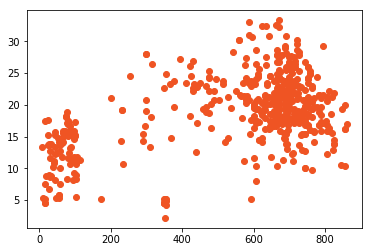

In [19]:
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')


Through Code

step 1: find mean

In [21]:
mean_x = np.mean(x)
mean_y = np.mean(y)

step 2: calculate b0,b1

In [28]:
# Total number of values
n = len(x)

# Using the formula to calculate b0 and b1
num = 0
den = 0

for i in range(n):
    num += (x[i] - mean_x) * (y[i] - mean_y)
    den += (x[i] - mean_x) ** 2
    
b1 = num / den
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

(array([0.01161502]), array([12.52483271]))


step 3: plot

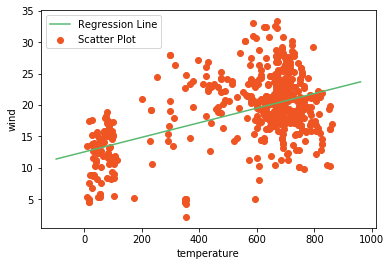

In [32]:


max_x = np.max(x) + 100
min_x = np.min(y) - 100

# Calculating line values x and y
X = np.linspace(min_x, max_x, 1000)
Y = b0 + b1 * X

# Ploting Line
plt.plot(X, Y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('temperature')
plt.ylabel('wind')
plt.legend()
plt.show()

Inference - There ain't  a strong relation between temperature and wind